TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [1]:
import ROOT
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
from utils import HistCollection as HC
from utils import show_event, CANVAS

Welcome to JupyROOT 6.08/02


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [2]:
hists_TTZ = HC("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
hists_TTW = HC("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
hists_TTTT = HC("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Loading unchanged result file  ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.root


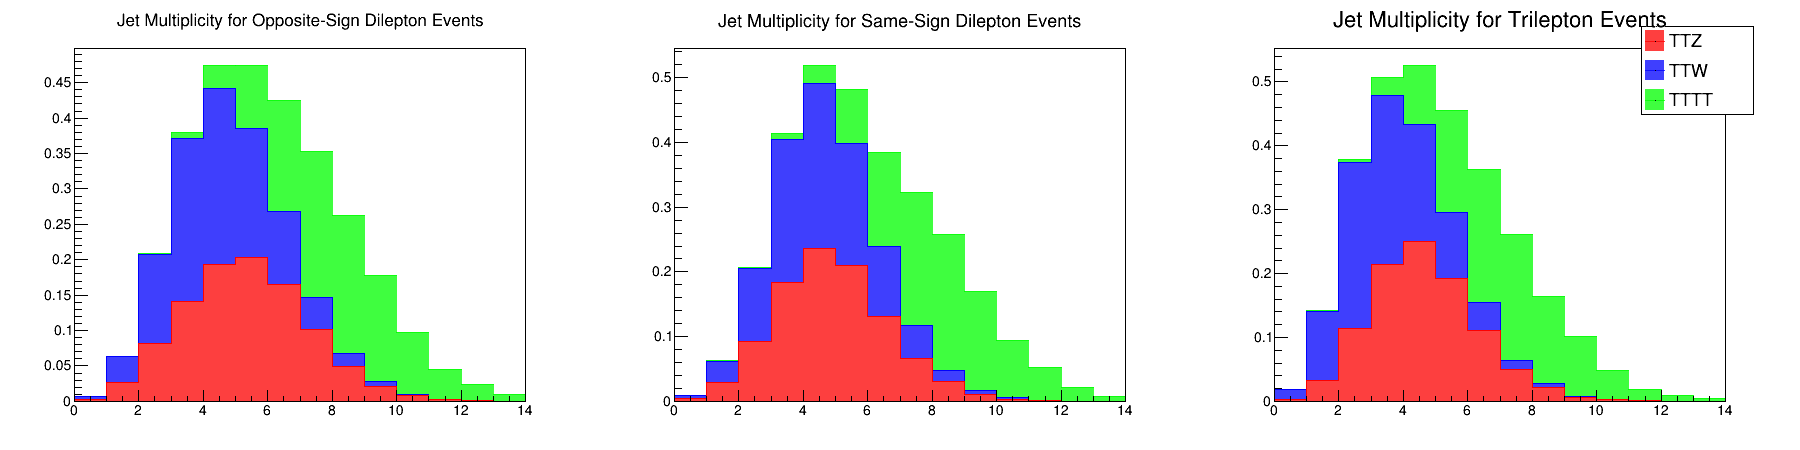

In [3]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=1,
                    enable_fill=True,
                    shape=(3,1),
                   )
CANVAS.Draw()

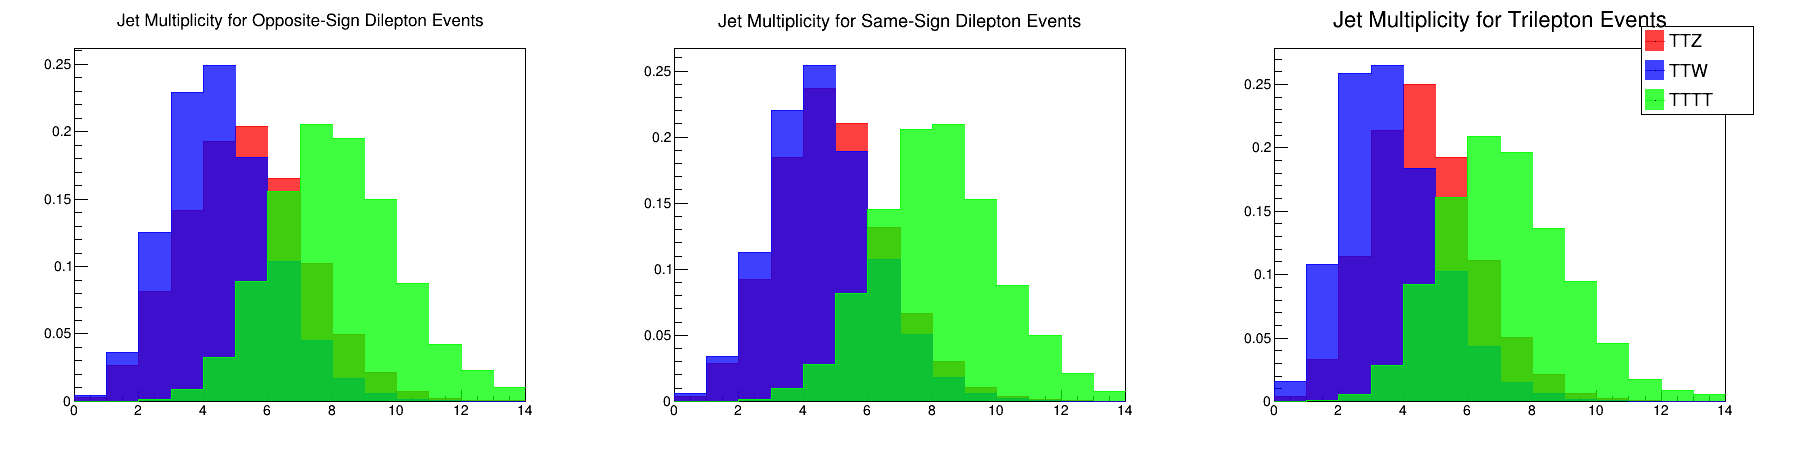

In [4]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=1,
                    enable_fill=True,
                    shape=(3,1),
                    draw_option='nostack',
                   )
CANVAS.Draw()

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Green means higher, red means lower

  - TTZ Generator-Level Particles
{{show_event(hists_TTZ, 7)}}
-----------------------------------------
  - TTW Generator-Level Particles
{{show_event(hists_TTW, 7)}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{show_event(hists_TTTT, 7)}}

<ROOT.THStack object ("lepton_count_stack") at 0xf9b1830>

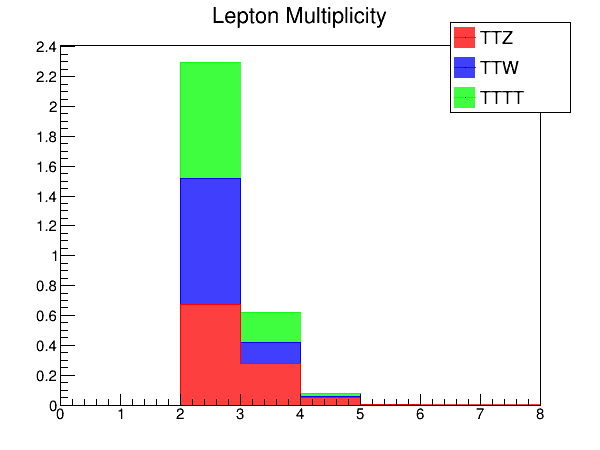

In [5]:
HC.stack_hist("lepton_count", title="Lepton Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x5d42200>

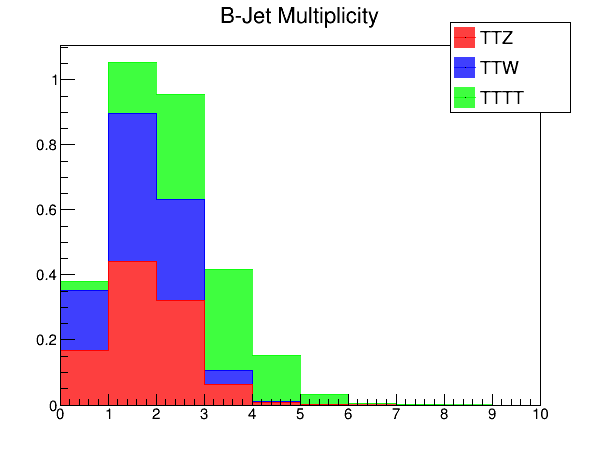

In [6]:
HC.stack_hist("b_jet_count", title="B-Jet Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)